In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install sdv

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

import common

In [5]:
data_set_path = "../temp_sets_100/"

# Microbiologyevents

## Data Process

### Read samples

In [6]:
microbiologyevents_df = common.read_csv_no_rowid(data_set_path + "microbiologyevents.csv")

In [7]:
microbiologyevents_df.head()

,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,44346,140114,4/5/2165,4/5/2165 13:00,70091,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44346,140114,4/9/2165,4/9/2165 2:26,70091,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44346,140114,4/12/2165,4/12/2165 12:03,70026,CSF;SPINAL FLUID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22903,108403,4/21/2200,4/21/2200 12:00,70091,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22903,108403,4/21/2200,4/21/2200 12:00,70070,SWAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data preproces

In [8]:
# Drop some columns. This cell must be below of Deal with null values
microbiologyevents_df.drop(['chartdate'], axis=1, inplace=True)

#### Deal with missing values

In [9]:
common.nan_count(microbiologyevents_df)

Total columns: 14
Total rows: 1935
--------------
subject_id                0
hadm_id                   0
charttime               154
spec_itemid               0
spec_type_desc            0
org_itemid              854
org_name                854
isolate_num             854
ab_itemid              1034
ab_name                1034
dilution_text          1086
dilution_comparison    1090
dilution_value         1090
interpretation         1034
dtype: int64


In [10]:
# Drop some null value
microbiologyevents_df.dropna(subset=['subject_id', 'hadm_id', 'spec_itemid', 'charttime'], inplace=True, axis=0)

In [11]:
common.nan_count(microbiologyevents_df)

Total columns: 14
Total rows: 1781
--------------
subject_id                0
hadm_id                   0
charttime                 0
spec_itemid               0
spec_type_desc            0
org_itemid              792
org_name                792
isolate_num             792
ab_itemid               962
ab_name                 962
dilution_text          1012
dilution_comparison    1016
dilution_value         1016
interpretation          962
dtype: int64


In [12]:
# # Deal with null values
# microbiologyevents_df['charttime'].fillna(microbiologyevents_df['chartdate'], inplace=True)

# microbiologyevents_df['org_itemid'].fillna(value=0, inplace=True)
# microbiologyevents_df['isolate_num'].fillna(value=0, inplace=True)
# microbiologyevents_df['ab_itemid'].fillna(value=0, inplace=True)

# microbiologyevents_df['org_name'].fillna(value='Na', inplace=True)
# microbiologyevents_df['ab_name'].fillna(value='Na', inplace=True)
# microbiologyevents_df['dilution_comparison'].fillna(value='Na', inplace=True)
# microbiologyevents_df['org_name'].fillna(value='Na', inplace=True)

# microbiologyevents_df['dilution_value'].fillna(value=999, inplace=True)

#### Deal with missing values

In [13]:
microbiologyevents_df.dtypes

subject_id               int64
hadm_id                  int64
charttime               object
spec_itemid              int64
spec_type_desc          object
org_itemid             float64
org_name                object
isolate_num            float64
ab_itemid              float64
ab_name                 object
dilution_text           object
dilution_comparison     object
dilution_value         float64
interpretation          object
dtype: object

In [14]:
microbiologyevents_df['charttime'] = pd.to_datetime(microbiologyevents_df['charttime'])
# microbiologyevents_df['spec_itemid'] = microbiologyevents_df['spec_itemid'].astype(int)
# microbiologyevents_df['org_itemid'] = microbiologyevents_df['org_itemid'].astype(int)
# microbiologyevents_df['isolate_num'] = microbiologyevents_df['isolate_num'].astype(int)
# microbiologyevents_df['ab_itemid'] = microbiologyevents_df['ab_itemid'].astype(int)

In [15]:
microbiologyevents_df.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int64
spec_type_desc                 object
org_itemid                    float64
org_name                       object
isolate_num                   float64
ab_itemid                     float64
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [16]:
microbiologyevents_df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'spec_itemid', 'spec_type_desc',
       'org_itemid', 'org_name', 'isolate_num', 'ab_itemid', 'ab_name',
       'dilution_text', 'dilution_comparison', 'dilution_value',
       'interpretation'],
      dtype='object')

---

## Build model

### Set constraints

In [17]:
from sdv.constraints import FixedCombinations

fixed_org_itemid_org_name_constraint = FixedCombinations(
    column_names=['org_itemid', 'org_name']
)
fixed_itemid_value_valueuom_constraint = FixedCombinations(
    column_names=['spec_itemid', 'spec_type_desc']
)
fixed_dilution_constraint = FixedCombinations(
    column_names=['ab_itemid', 'ab_name', 'dilution_text', 'dilution_comparison', 'dilution_value']
)

In [18]:
constraints = [fixed_org_itemid_org_name_constraint, fixed_itemid_value_valueuom_constraint, fixed_dilution_constraint]

In [20]:
train_data = microbiologyevents_df
best_model = common.build_model(constraints=constraints, train_data=train_data)

Strat training ...
Tabular Preset


Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 27254.82it/s]

Gaussian Copula



Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 28888.65it/s]


CTGAN


Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 16925.31it/s]


CopulaGAN


Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 16349.75it/s]


TVAE


Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 22310.39it/s]


Training finished!
Strat evaluating ...
Evaluating finished!
Gaussian Copula


Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 28583.23it/s]


The best model is: tvae
The ContinuousKL_score is: 0.6216214906037414
The DiscreteKL_score is: 0.37424982259222556
The total score is: 0.5735234603325395


In [21]:
# Save model
model_save_path = data_set_path + "100_models/" + "microbiologyevents_model.pkl"
common.save_model(best_model, model_save_path)

---

## Evaluate data

### Generate synthetic data

In [22]:
# Load model
date_load_path = data_set_path + "100_models/" + "microbiologyevents_model.pkl"
model = common.load_model(date_load_path)

In [23]:
sample = model.sample(num_rows=len(microbiologyevents_df))

Sampling rows: 100%|██████████| 1781/1781 [00:00<00:00, 27518.37it/s]


In [24]:
common.nan_count(sample)

Total columns: 14
Total rows: 1781
--------------
subject_id               0
hadm_id                  0
charttime                0
spec_itemid              0
spec_type_desc           0
org_itemid             560
org_name               560
isolate_num            790
ab_itemid              785
ab_name                785
dilution_text          785
dilution_comparison    785
dilution_value         785
interpretation         806
dtype: int64


### Evaluation

In [25]:
from sdv.evaluation import evaluate

In [26]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.6184131094118339

In [27]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

0.3699932996154179

In [28]:
evaluate(sample, train_data)

0.5705533158115766

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

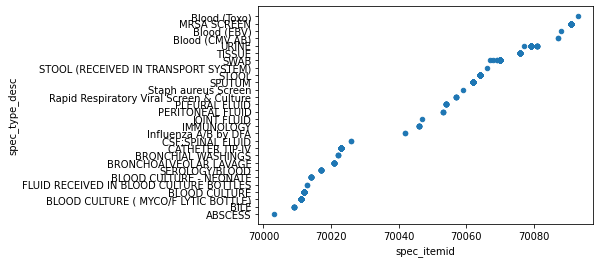

In [29]:
sample.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

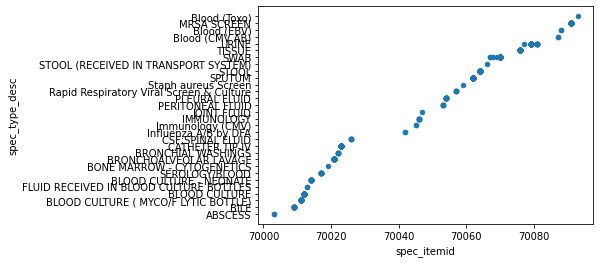

In [30]:
train_data.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:>

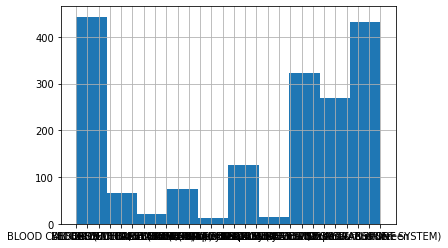

In [31]:
sample.sort_values('spec_type_desc')['spec_type_desc'].hist()

<AxesSubplot:>

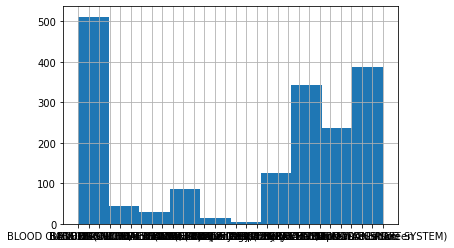

In [32]:
train_data.sort_values('spec_type_desc')['spec_type_desc'].hist()

In [33]:
# evaluate(sample, train_data, aggregate=False)